In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from math import sqrt


In [3]:
rim_width = 1.2192 #4ft
rim_height = 2.64
cargo_radius = 0.2413/2

def flight_model(t, s):
    x, vx, y, vy = s
    dx = vx
    dvx = 0
    dy = vy
    dvy = -9.8
    return [dx, dvx, dy, dvy]

def hit_ground(t, s):
    x, vx, y, vy = s
    return y
hit_ground.terminal = True

def hit_rim(t, s):
    x, vx, y, vy = s
    dist_to_rim = min(x - -rim_width/2, -(y - rim_height)) #positive if cargo is down and to the right of closest rim
    return dist_to_rim + cargo_radius
hit_rim.terminal = True

def passed_rim(t, s):
    x, vx, y, vy = s
    return x - rim_width/2
passed_rim.terminal = True

undershot


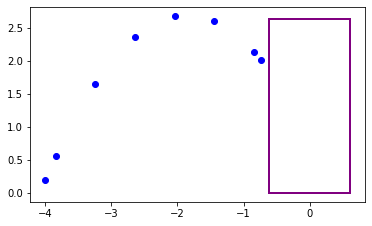

result: -1


In [4]:
def try_shot(s0, doShow):
    t_span = (0, 5.0)
    solution = solve_ivp(flight_model, t_span, s0, events=[hit_ground, hit_rim, passed_rim], max_step=0.2)

    result = 0 #default is success
    if(solution.y[0][-1] < -rim_width/2):
        result = -1 #undershot
    elif(solution.y[0][-1] > rim_width/2 - cargo_radius):
        result = 1 #overshot

    if doShow:

        if result == -1: print("undershot")
        elif result == 0: print("success")
        elif result == 1: print("overshot")

        plt.plot(solution.y[0, :], solution.y[2, :], 'bo')

        left, bottom, width, height = (-rim_width/2, 0, rim_width, rim_height)
        rect=mpatches.Rectangle((left,bottom), width, height, fill=False, color="purple", linewidth=2)
        plt.gca().add_patch(rect)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()

    return result

#s0 is [xpos, xvel, ypos, yvel]
print("result:", try_shot(s0=[-4, 3, 0.2, 7], doShow=True))


In [16]:
x_range = np.arange(-6, -1, 0.25)
vx_range = np.arange(1, 5, 0.5)
y_range = np.arange(0.2, 1.4, 0.1)
vy_range = np.arange(7, 15, 1)

everything = np.zeros((x_range.size, vx_range.size, y_range.size, vy_range.size))
print("everything shape", everything.shape)

heatmap = np.zeros((x_range.size, y_range.size, 3))
vel_combos = vx_range.size * vy_range.size

for xi in range(x_range.size):
    for yi in range(y_range.size):

        num_zeros = 0

        for vxi in range(vx_range.size):
            for vyi in range(vy_range.size):
                cell = try_shot(s0=[x_range[xi], vx_range[vxi], y_range[yi], vy_range[vyi]], doShow=False)
                everything[xi][vxi][yi][vyi] = cell
                if cell == 0:
                    num_zeros += 1

        heatmap[xi, yi, 0] = num_zeros / vel_combos #overall probability of hitting target 



    print(f'x pos index {xi} of {x_range.size}')

print("done")

everything shape (20, 8, 12, 8)
x pos index 0 of 20
x pos index 1 of 20
x pos index 2 of 20
x pos index 3 of 20
x pos index 4 of 20
x pos index 5 of 20
x pos index 6 of 20
x pos index 7 of 20
x pos index 8 of 20
x pos index 9 of 20
x pos index 10 of 20
x pos index 11 of 20
x pos index 12 of 20
x pos index 13 of 20
x pos index 14 of 20
x pos index 15 of 20
x pos index 16 of 20
x pos index 17 of 20
x pos index 18 of 20
x pos index 19 of 20
done


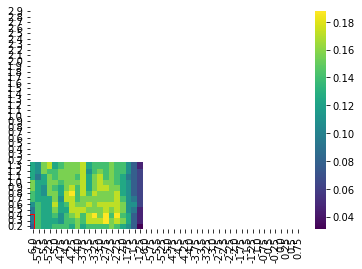

In [27]:
import seaborn as sns

overall_prob = heatmap[:, :, 0]
overall_prob = np.swapaxes(overall_prob, 0, 1)

xlabels = np.round(np.append(x_range, np.arange(min(x_range), 1, 0.25)), 2)
ylabels = np.round(np.append(y_range, np.arange(min(y_range), 3, 0.1)), 2)

ax = sns.heatmap(overall_prob, xticklabels=xlabels, yticklabels=ylabels, cmap='viridis')
ax.invert_yaxis()

left, bottom, width, height = (-rim_width/2, 0, rim_width, rim_height)

ax.add_patch(mpatches.Rectangle((left, bottom), width, height, edgecolor='red', fill=False, lw=1))


success


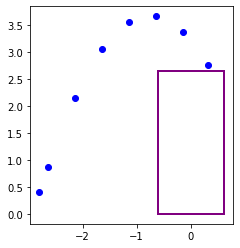

0

In [19]:
try_shot(s0=[-2.8, 2.5, 0.4, 8], doShow=1)

at x -2.0 and y 0.6000000000000001
[[-1. -1.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]]


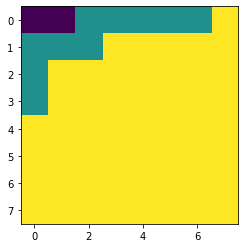

In [7]:
xi, yi = 8, 2
x, y = x_range[xi], y_range[yi]
print("at x", x, "and y", y)
print(everything[xi, :, yi, :])
plt.figure()
plt.imshow(everything[xi, :, yi, :])

# def avg(range_tuple):
#     return (range_tuple[0] + range_tuple[1]) * 0.5

# x = -4
# vx = 3
# y = 0.5
# vy = 8
# prev_result = 0

# #find the max x
# x = avg((x, x_range[1]))
# result = try_shot([x, vx, y, vy], doShow=False)
# if(result == -1):
#     x = avg((x, x_range[1]))
# elif(result == 0):
#     x = avg((x, x_range[1]))
# elif(result == 1):
#     x = avg((x, x_range[1]))


success


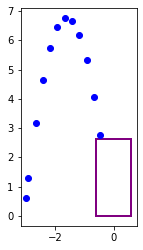

0

In [8]:
try_shot(s0=[-3, 1.25, 0.6, 11], doShow=True)